In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [22]:
df = pd.read_csv('data/women_shoes.csv', low_memory=False)
df.shape

(18001, 47)

In [0]:
list_means = []

Wartość średnia 

In [108]:
mean_price = np.mean( df['prices_amountmin'])
list_means.append(mean_price)
mean_price


80.91430476084132

Wartość średnia 

In [109]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absol_err = mean_absolute_error(y_true, y_pred)
list_means.append(mean_absol_err)

mean_absol_err

67.18691922456821

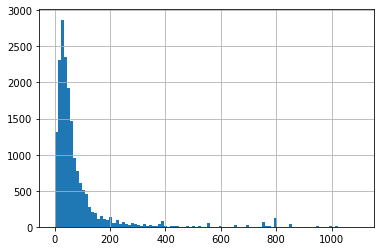

In [34]:
df["prices_amountmin"].hist(bins=100)

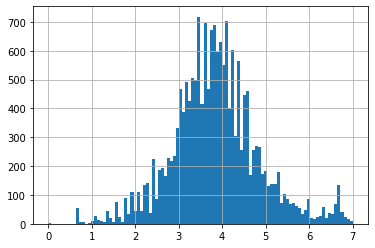

In [36]:
np.log1p( df["prices_amountmin"]).hist(bins=100)

Mediana

In [110]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]
list_means.append(mean_absol_err)
median_absol_err = mean_absolute_error(y_true, y_pred)
median_absol_err

56.284606410754954

Średnia warość logarytmu

In [111]:
y_true = df['prices_amountmin']
price_log_mean =np.expm1(np.mean(np.log1p(y_true)) ) 
y_pred = [price_log_mean] * y_true.shape[0]
log_absol_err = mean_absolute_error(y_true, y_pred)
list_means.append(mean_absol_err)


log_absol_err

56.31106186683235

In [0]:
def run_model(feats):

  x = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')

  return np.mean(scores), np.std(scores)


In [113]:
df['brand_cat'] = df['brand'].factorize()[0]

(brand_f, brand_s)  = run_model(['brand_cat'])
list_means.append(abs(brand_f))
abs(brand_f)

51.7790224568183

In [116]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

(manuf_f, manuf_s) = run_model(['manufacturer_cat'])
list_means.append(abs(manuf_f))
abs(manuf_f)

67.71896474272188

In [115]:
df['categories_cat'] = df['categories'].factorize()[0]

(categ_f, categ_s)  = run_model(['categories_cat'])
list_means.append(abs(categ_f))
abs(categ_f)


60.5268158914172

In [117]:
(bra_manu_f, bra_manu_s)= run_model(['brand_cat', 'manufacturer_cat'])
list_means.append(abs(bra_manu_f))
abs(bra_manu_f)

51.45401686830778

In [131]:
list_means

[80.91430476084132,
 67.18691922456821,
 67.18691922456821,
 51.7790224568183,
 60.5268158914172,
 67.71896474272188,
 51.45401686830778]

In [0]:
import matplotlib.pyplot as plt

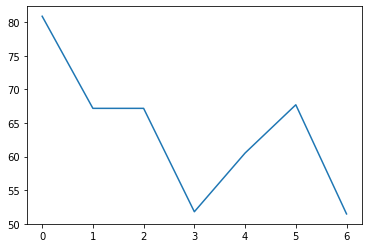

In [132]:
plot_data = np.arange(0,len(list_means),1)
plt.plot(plot_data, list_means)


In [0]:
!git add Day4.ipynb
!git commit -m"Added plot "
!git push